In [317]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
train = pd.read_csv('train.csv')          # data['title']  # as a Series
                                          # data['title'].values  # as a numpy array
x = train['x'].values;n=700
y = train['y'].values
p = np.zeros(700)         #predicted y values
#plt.scatter(x,y)
print(len(x))

700


In [318]:
def cost_function(x,y,w,b):
    #Jt = 0
    #n=x.shape[0]
    #for i in range(0,n):
    #   Jt += (w*x[i]+b - y[i])**2
    #J = Jt/(2*n)
    Jr = np.sum((x*w + b - y)**2)
    J = Jr/(2*n)

    return J
cost_function(x,y,2,1)
print(len(x))

700


In [319]:
def gradient_function(x,y,w,b):
    #dJ_w=0
    #dJ_b=0
    #n=x.shape[0]
    #for i in range(0,n):
    #    dJ_w += (w*x[i]+b - y[i])*x[i]
    #    dJ_b += (w*x[i]+b - y[i])
    
    #dJ_w = dJ_w/n
    #dJ_b = dJ_b/n
    dJ_w = (np.sum((x*w + b - y)*x))/n
    dJ_b = (np.sum(x*w + b - y))/n
    return dJ_w,dJ_b
    
gradient_function(x,y,2,1)


(3394.2383484396896, 51.11712089038571)

In [320]:
def gradient_descent(x,y,w,b,alpha,iter):
    warr = np.zeros(iter)
    Jwarr = np.zeros(iter)
    barr = np.zeros(iter)
    
    for i in range(iter):
        djw,djb=gradient_function(x,y,w,b)     # Derivatives of cost functions w.r.t 'w' and 'b'
        #print(w,b)
        
        tw=w-alpha*djw
        tb=b-alpha*djb
        
        warr[i]=tw;barr[i]=tb;Jwarr[i]=cost_function(x,y,tw,tb)
        w = tw;b=tb
        
        if i%100==0:
            print(i,'iter => w:',warr[i],' b:',barr[i],' cost:',Jwarr[i])
        
        
    return w,b,warr,barr,Jwarr



0 iter => w: 0.9996541194417453  b: 0.009991859339532857  cost: 3.93396267296055
100 iter => w: 0.9989693826116871  b: 0.009686016293268828  cost: 3.9331601282836033
200 iter => w: 0.9989737982335779  b: 0.009391235371057259  cost: 3.9331514368588785
300 iter => w: 0.998978202814712  b: 0.00909719151477677  cost: 3.933142788843638
400 iter => w: 0.9989825963826954  b: 0.008803882881478438  cost: 3.9331341840210747
500 iter => w: 0.9989869789650653  b: 0.00851130763282141  cost: 3.9331256221754627
600 iter => w: 0.99899135058929  b: 0.008219463935061377  cost: 3.9331171030921483
700 iter => w: 0.9989957112827691  b: 0.007928349959039118  cost: 3.9331086265575603
800 iter => w: 0.9990000610728337  b: 0.00763796388016902  cost: 3.9331001923591833
900 iter => w: 0.9990043999867464  b: 0.007348303878427624  cost: 3.933091800285571
1000 iter => w: 0.9990087280517017  b: 0.007059368138342235  cost: 3.9330834501263294
0.9990087280517017 0.007059368138342235 3.9330834501263294


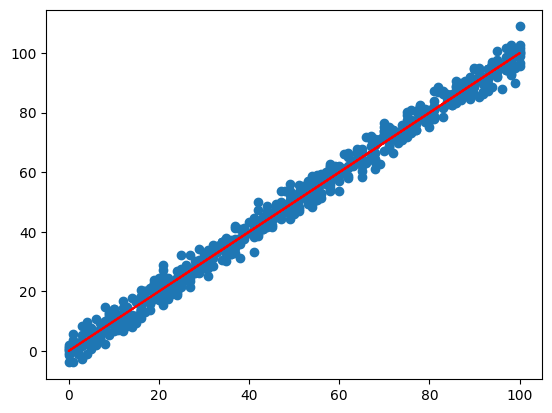

In [321]:

#plt.title('Model')
#plt.xlabel('X')
#plt.ylabel('Y')


w,b,warr,barr,Jwarr=gradient_descent(x,y,1,0.01,0.0001,1001)
print(w,b,Jwarr[-1])

plt.plot(x,x*w+b,c='r') 
plt.scatter(x,y)
plt.show()

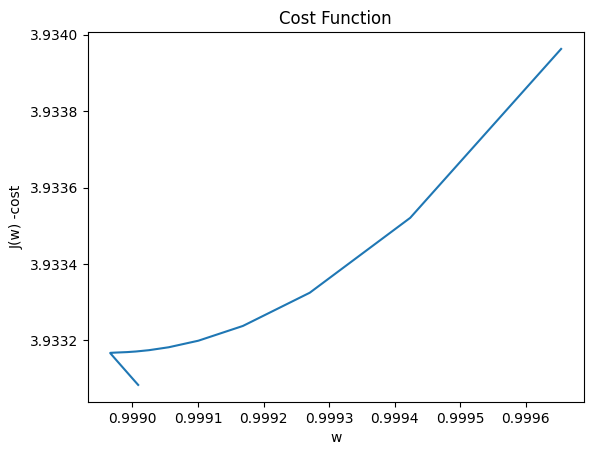

In [322]:
plt.plot(warr,Jwarr)
plt.title('Cost Function')
plt.xlabel('w')
plt.ylabel('J(w) -cost')

plt.show()

In [323]:
# Now testing Model
test = pd.read_csv("test.csv")

xt = test['x'].values
yt = test['y'].values
print(w,b,Jwarr[-1])

y = yt[:-1]
yhat = xt[:-1]*w+b

y = np.round(y,decimals=4)
yhat = np.round(yhat,decimals=4)

for i in range(0,10):
    print(y[i],yhat[i])

cost = cost_function(xt,yt,w,b)
print(cost)

0.9990087280517017 0.007059368138342235 3.9330834501263294
79.7752 76.9307
23.1773 20.9862
25.6093 21.9853
17.8574 19.9872
41.8499 35.9714
9.8052 14.9922
58.8747 61.9456
97.6179 94.9129
18.3951 19.9872
8.7467 5.0021
2.025373066602027


0 iter => w: 1.3579068054255001  b: 0.12137059285714286  cost: 2.6406912823460726
100 iter => w: 0.9196758447572195  b: -1.1747427018541123  cost: 0.7137858137895485
200 iter => w: 1.0052302861218227  b: -2.0263624529715236  cost: 0.6644678922540826
300 iter => w: 1.0640082372878357  b: -2.6114456274366313  cost: 0.6411897384685469
400 iter => w: 1.1043900981026444  b: -3.013411787325479  cost: 0.630202405126176
500 iter => w: 1.1321334040620654  b: -3.289572170579544  cost: 0.6250163626638487
600 iter => w: 1.1511937200065894  b: -3.479300970884824  cost: 0.6225685406507178
700 iter => w: 1.1642886137599313  b: -3.609649202738792  cost: 0.6214131639542302
800 iter => w: 1.173285119531945  b: -3.699201561263787  cost: 0.6208678239321103
900 iter => w: 1.1794659345603389  b: -3.7607261773120806  cost: 0.6206104223931749
1000 iter => w: 1.1837123025818055  b: -3.802995062713165  cost: 0.620488928371906
1100 iter => w: 1.1866296591587127  b: -3.8320347997778788  cost: 0.6204315829602773
1

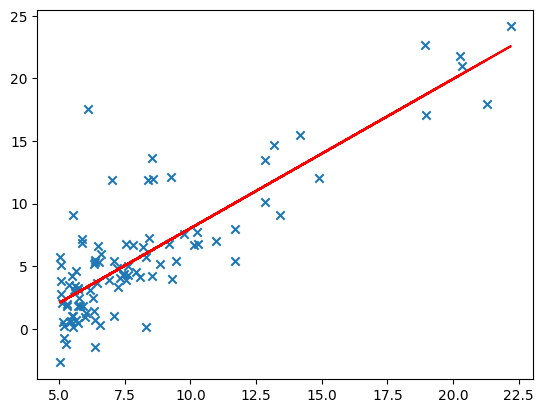

In [324]:
# e.g. from coursera
def load_data():
    data = np.loadtxt("data/ex1data1.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y
x,y = load_data()
plt.scatter(x,y,marker='x')
w,b,warr,barr,Jwarr = gradient_descent(x,y,0.,0.,0.15,1501)
#print(w,b)
plt.plot(x,x*w+b,c='r')


In [326]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $2890.45
For population = 70,000, we predict a profit of $44596.69
